In [10]:
#!pip install tqdm
#!pip install scikit-image --user

In [11]:
# Import all the libaries
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [12]:
print(os.listdir("cancer"))

['.DS_Store', 'test', 'train', 'val']


In [13]:
print(os.listdir("cancer/train"))

['Cancer', 'Normal']


In [14]:
TRAIN_DIR = "cancer/train/"
TEST_DIR =  "cancer/test/"

# Modify this preprocessing step

In [15]:
#Preprocessing
def get_label(Dir):
    if Dir.split("/")[-1] == "Normal":
        label = 0
    elif Dir.split("/")[-1] == "Cancer":
        label = 1
    else:
        label = 2
    return label

def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            label = get_label(os.path.join(Dir, nextdir))
            temp = Dir + nextdir
            
            for image_filename in tqdm(os.listdir(temp)):
                path = os.path.join(temp, image_filename)
                img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y

def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            label = get_label(os.path.join(Dir, nextDir))
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y



In [16]:
X_train, y_train = get_data(TRAIN_DIR)

X_test , y_test = get_data(TEST_DIR)

print(X_train.shape,'\n',X_test.shape)

print(y_train.shape,'\n',y_test.shape)

y_test


100%|██████████| 620/620 [00:22<00:00, 27.57it/s]


(4961, 150, 150, 3) 
 (1240, 150, 150, 3)
(4961,) 
 (1240,)


array([1, 1, 1, ..., 0, 0, 0])

In [17]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train,2)
y_test = to_categorical(y_test,2)

print(y_train.shape,'\n',y_test.shape)

Pimages = os.listdir(TRAIN_DIR + "Cancer")
Nimages = os.listdir(TRAIN_DIR + "Normal")


(4961, 2) 
 (1240, 2)


(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


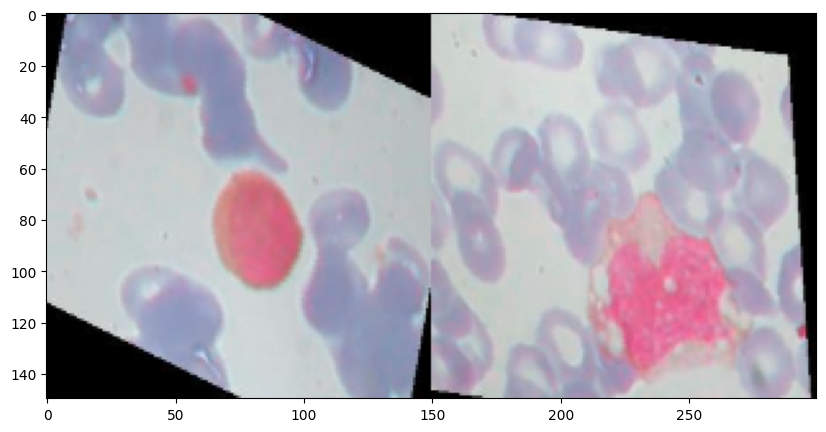

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


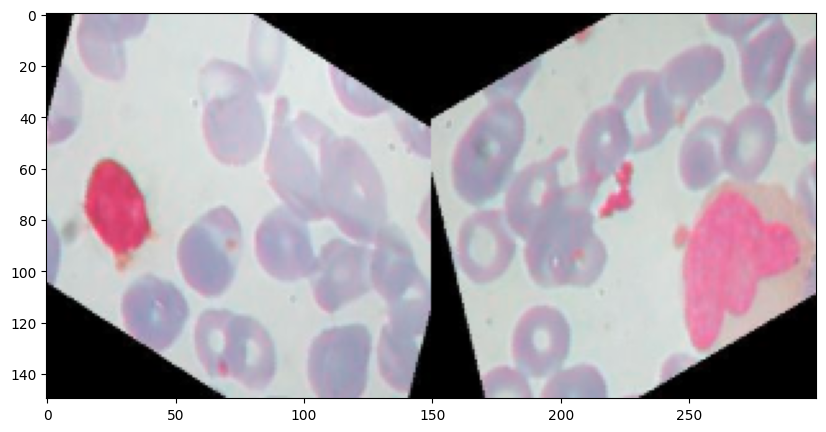

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


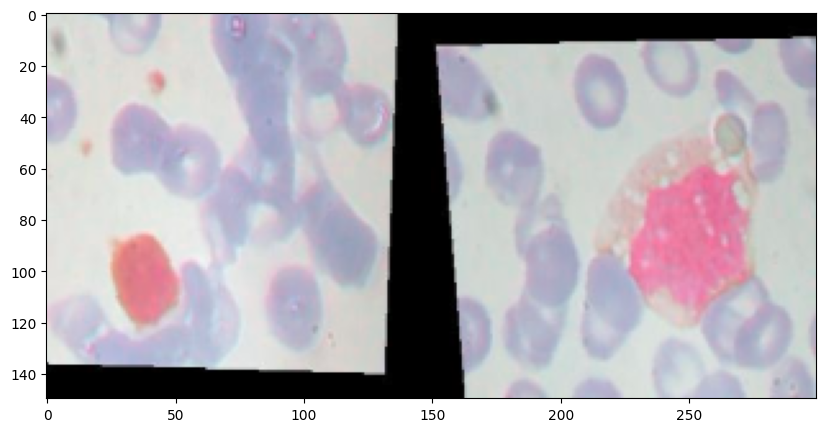

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


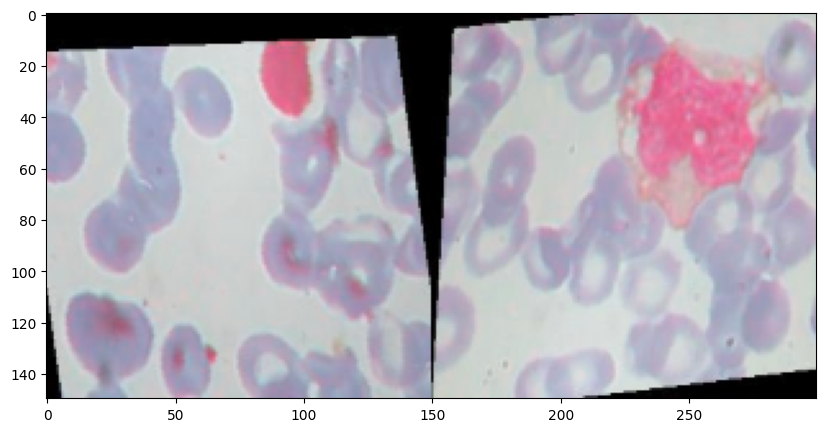

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


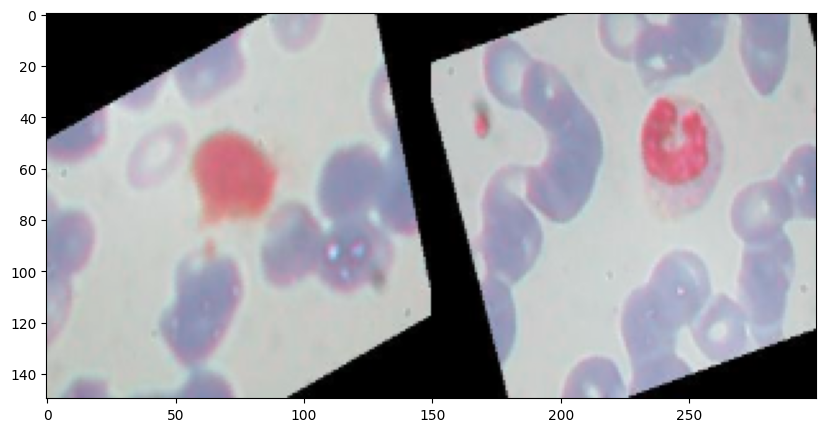

In [18]:
import matplotlib.pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"Cancer/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    imagen1 = cv2.imread(TRAIN_DIR+"Normal/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No CANCER Vs (Right) - CANCER")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

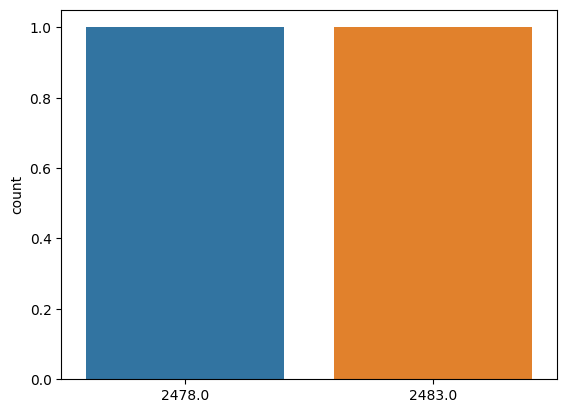

In [19]:
import seaborn as sns
count = y_train.sum(axis = 0)
sns.countplot(x = count)

from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [23]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier



In [24]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(150,150,3)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2 , activation='sigmoid'))



In [25]:
model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=0.00005),
                  metrics=['accuracy'])

print(model.summary())

batch_size = 256
epochs = 1

history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)

model.save('mymodel.h5')



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 conv2d_10 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)      

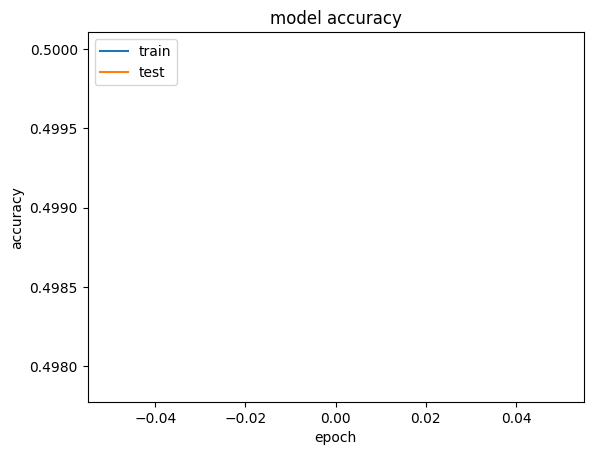

In [26]:
import matplotlib.pyplot as plt
from keras.models import load_model


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


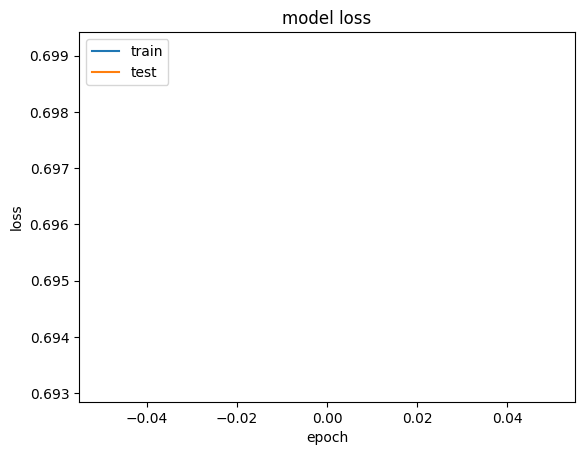

In [27]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

39/39 [==============================] - 57s 1s/step


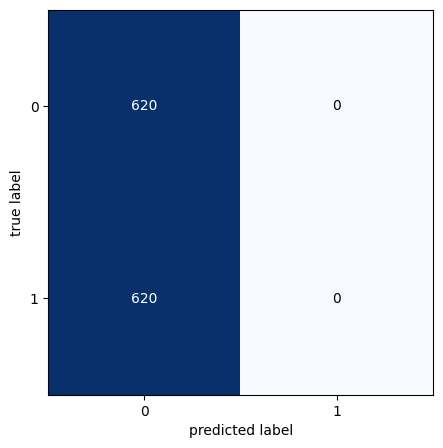

In [28]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [4]:
from keras.models import load_model
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

model = load_model('mymodel.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 conv2d_10 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)      

1/1 [==============================] - 7s 7s/step
Normal


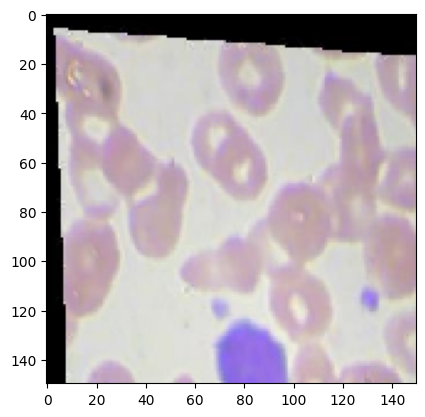

In [29]:
img = tf.keras.utils.load_img('cancer/test/Normal/_0_112.jpeg', target_size=(150, 150))
imgplot = plt.imshow(img)
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images)
pred_class=np.argmax(classes,axis=1)
if pred_class== [1]:
   print("cancer")
elif pred_class==[0]:
   print("Normal")